part 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [5]:
df = pd.read_excel('ENB2012_data.xlsx')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [6]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [14]:
df

,X1,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,X8,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [22]:
df.columns= ["X1", "Total Area", "Wall Area", "Roof Area", "Overall Height", "Orientation", 
               "Glazing Area", "X8", "Heating Load", "Cooling Load"]
df.head()

,X1,Total Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,X8,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


                          X1  Surface Area     Wall Area     Roof Area  \
X1              1.000000e+00 -9.919015e-01 -2.037817e-01 -8.688234e-01   
Surface Area   -9.919015e-01  1.000000e+00  1.955016e-01  8.807195e-01   
Wall Area      -2.037817e-01  1.955016e-01  1.000000e+00 -2.923165e-01   
Roof Area      -8.688234e-01  8.807195e-01 -2.923165e-01  1.000000e+00   
Overall Height  8.277473e-01 -8.581477e-01  2.809757e-01 -9.725122e-01   
Orientation     4.678592e-17 -3.459372e-17 -2.429499e-17 -5.830058e-17   
Glazing Area   -2.960552e-15  3.636925e-15 -8.567455e-17 -1.759011e-15   
X8             -7.107006e-16  2.438409e-15  2.067384e-16 -1.078071e-15   
Heating Load    6.222719e-01 -6.581199e-01  4.556714e-01 -8.618281e-01   
Cooling Load    6.343391e-01 -6.729989e-01  4.271170e-01 -8.625466e-01   

                Overall Height   Orientation  Glazing Area            X8  \
X1                8.277473e-01  4.678592e-17 -2.960552e-15 -7.107006e-16   
Surface Area     -8.581477e-01 -3

<Axes: >

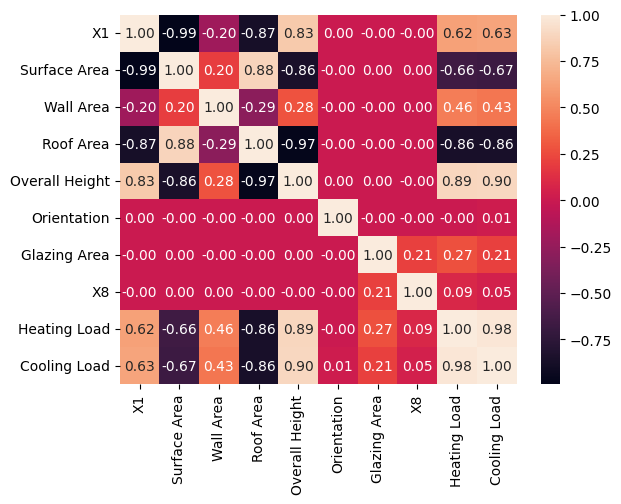

In [16]:
correlation = df[df.columns].corr()
print(correlation)
sns.heatmap(df[df.columns].corr(), annot = True, fmt = ".2f")

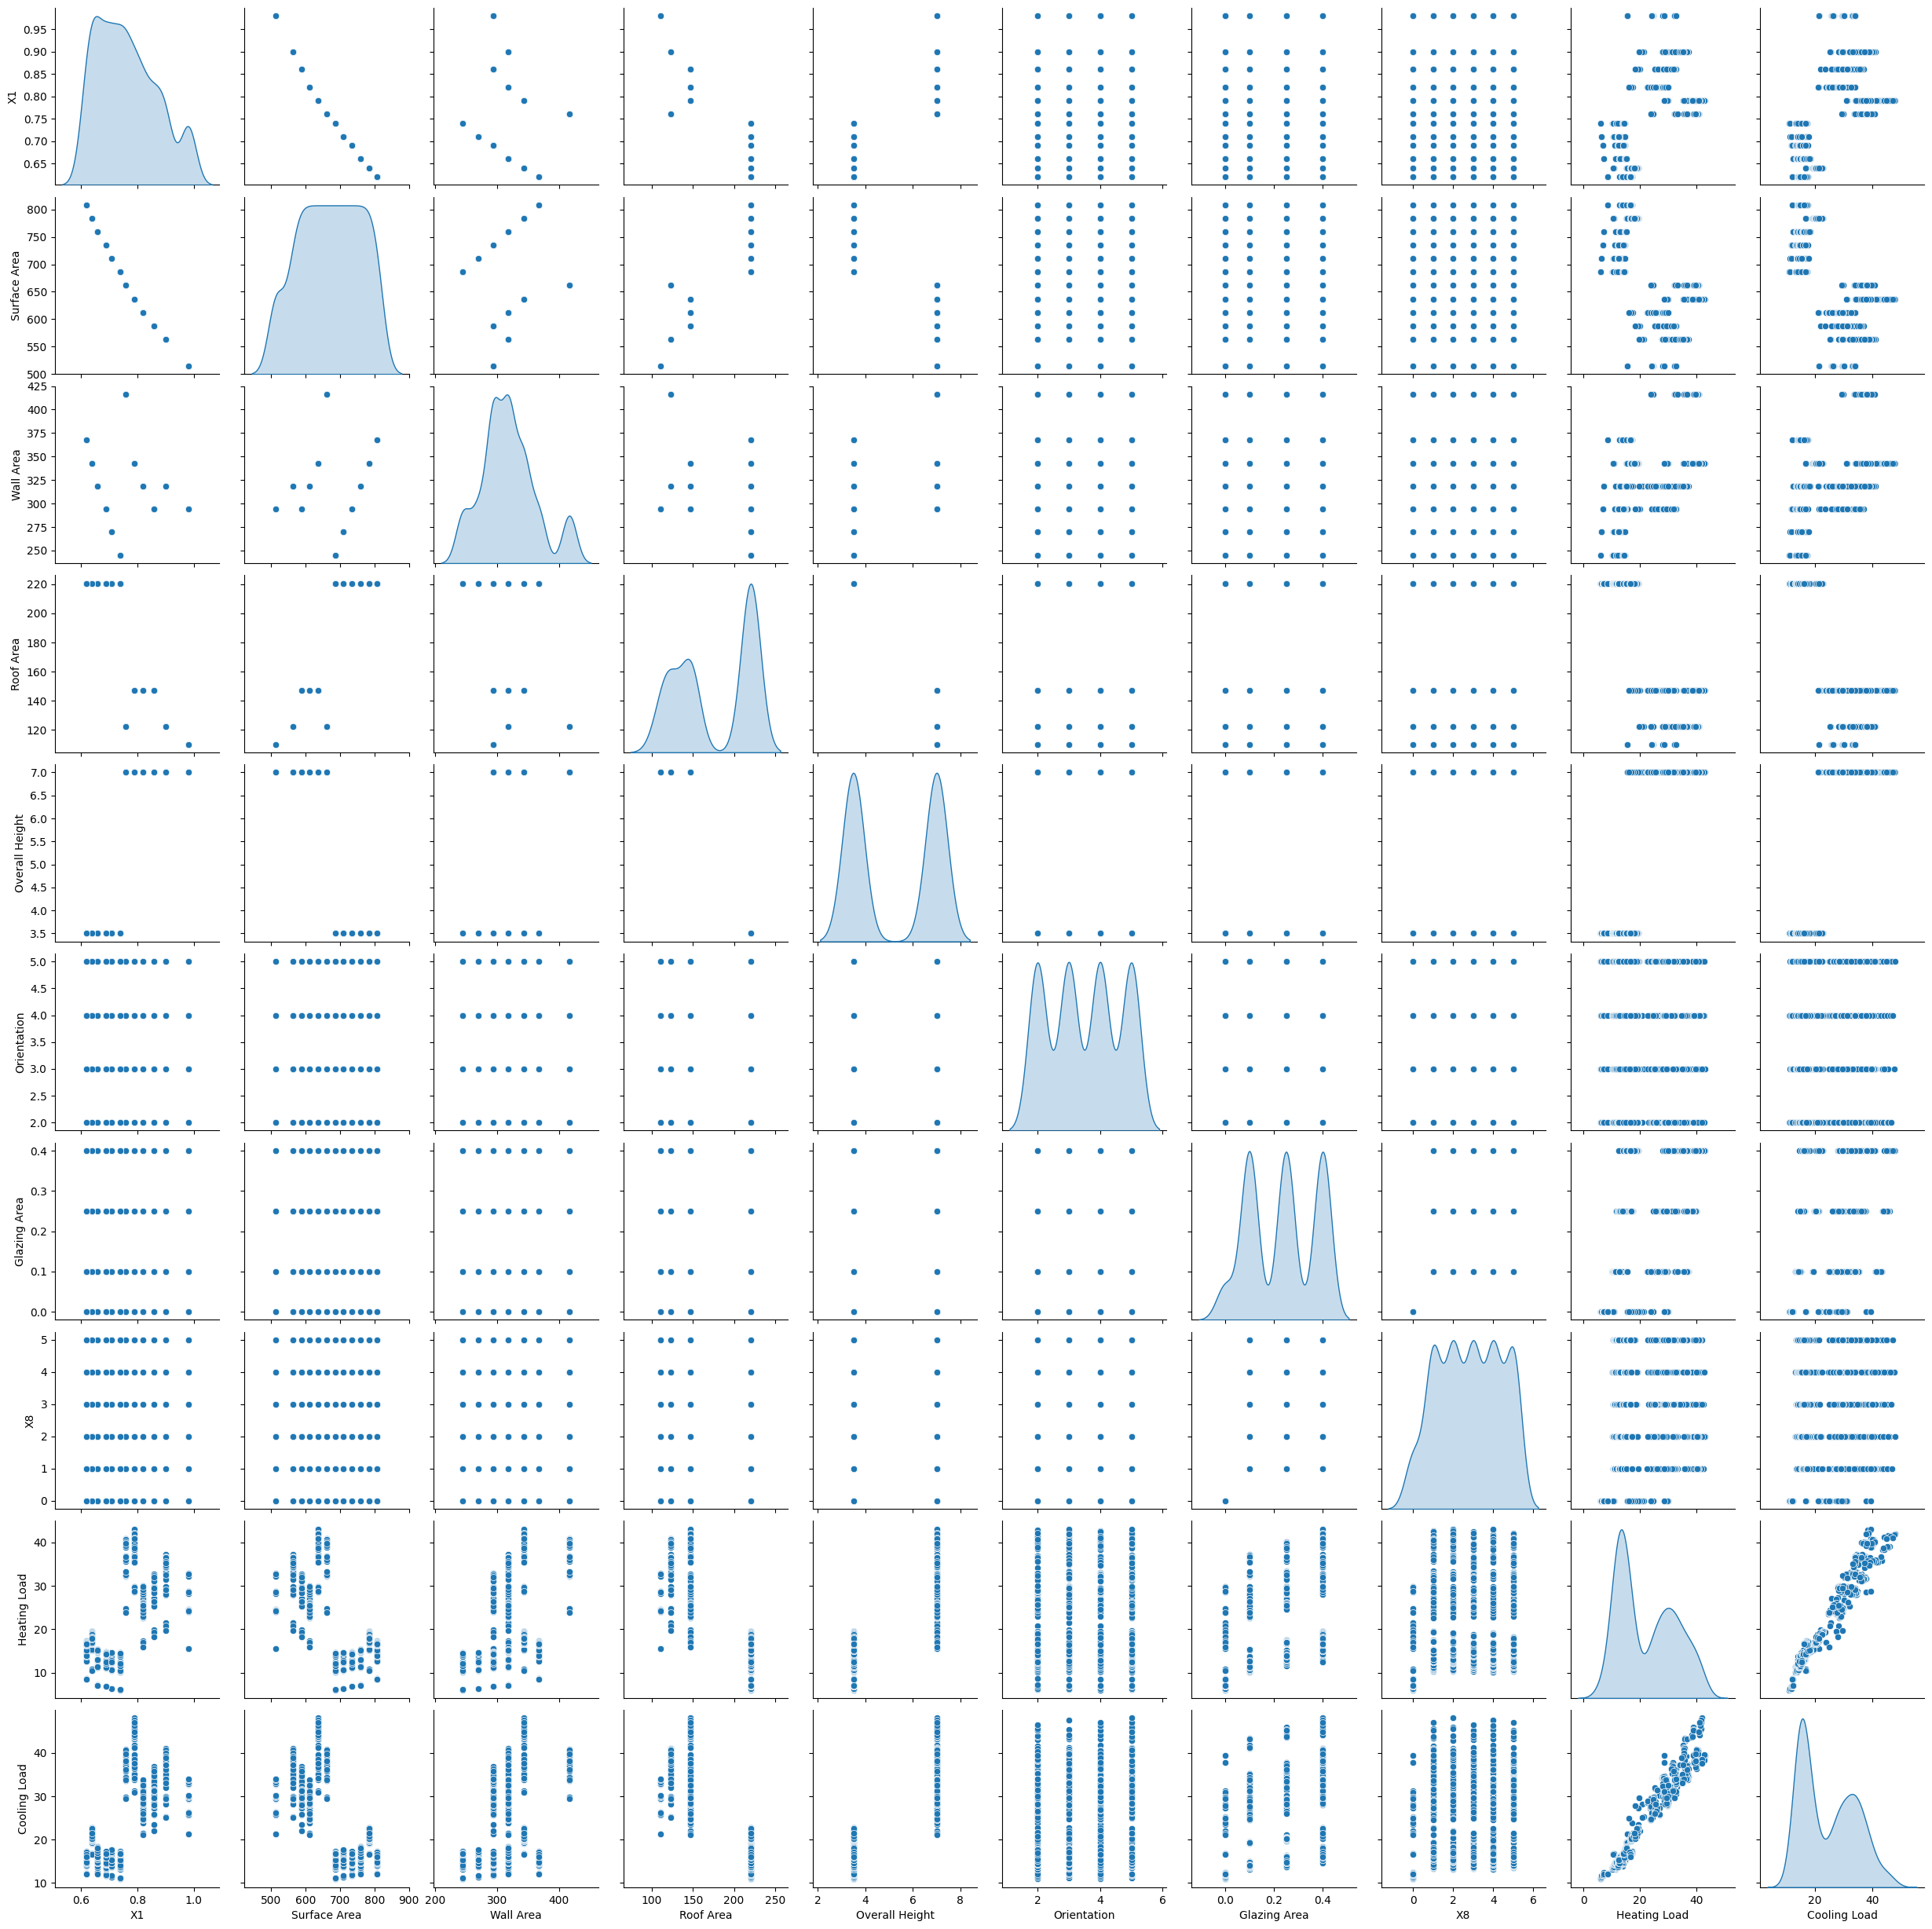

In [21]:
sns.pairplot(df, kind="scatter", diag_kind='kde')

In [52]:
mean = df["Heating Load"].mean()
stddev = df["Heating Load"].std()
print("Mean :", mean , "\nStd :", std)
upper_limit = mean + 3*std
lower_limit = mean - 3*std

df[(df["Heating Load"]<lower_limit) | (df["Heating Load"]>upper_limit)]

Mean : 22.3071953125 
Std : 10.090203970187025


,X1,Total Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,X8,Heating Load,Cooling Load


no outliers detected

part 2

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [91]:
X = df[["X1", "Wall Area", "Roof Area", "Overall Height",
               "Glazing Area"]] 
# take only those column which had enough correlation with heating load and we can choose any two of wall area, total area, roof area
Y = df[["Heating Load"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train

,X1,Wall Area,Roof Area,Overall Height,Glazing Area
60,0.82,318.5,147.00,7.0,0.10
618,0.64,343.0,220.50,3.5,0.40
346,0.86,294.0,147.00,7.0,0.25
294,0.90,318.5,122.50,7.0,0.25
231,0.66,318.5,220.50,3.5,0.10
...,...,...,...,...,...
71,0.76,416.5,122.50,7.0,0.10
106,0.86,294.0,147.00,7.0,0.10
270,0.71,269.5,220.50,3.5,0.10
435,0.98,294.0,110.25,7.0,0.25


part 3

In [87]:
X_train_with_one = np.c_[np.ones(X_train.shape[0]), X_train] 
X_test_with_one = np.c_[np.ones(X_test.shape[0]), X_test] 

def multivar_lin_alg(X, Y):
    temp = np.linalg.inv(X.T @ X) @ (X.T) @ Y
    return temp

temp = multivar_lin_alg(X_train_with_one, Y_train)
Y_pred = X_test_with_one @ temp
print(Y_pred.shape)

(154, 1)


In [81]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
ridge_regressor = Ridge(alpha=0.2)
ridge_regressor.fit(X_train, Y_train)
ridge_predictions = ridge_regressor.predict(X_test)
ridge_mse = mean_squared_error(Y_test, ridge_predictions)
ridge_r2 = r2_score(Y_test, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)
print("Mean Squared Error (MSE):", ridge_mse)
print("R2 Score:", ridge_r2)
print("Root Mean Squared Error (RMSE):", ridge_rmse)


Mean Squared Error (MSE): 9.568597814649298
R2 Score: 0.9081993990105642
Root Mean Squared Error (RMSE): 3.0933150202734443


In [88]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.2)
ridge.fit(X_train, Y_train)
Y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
R2_ridge = r2_score(Y_test, Y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print("Mean Squared Error",mse_ridge)
print("R2 score",R2_ridge)
print("Root Mean squared Error",rmse_ridge)

Mean Squared Error 9.568598900749972
R2 score 0.9081993885905741
Root Mean squared Error 3.093315195829544


In [84]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
lasso_model = Lasso(alpha=0.2)
lasso_model.fit(X_train, Y_train)
predicted_values = lasso_model.predict(X_test)
mse = mean_squared_error(Y_test, predicted_values)
r2 = r2_score(Y_test, predicted_values)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 11.644694061858779
R2 Score: 0.8882814458373252
Root Mean Squared Error: 3.4124322794538764


part4

<Figure size 640x480 with 0 Axes>

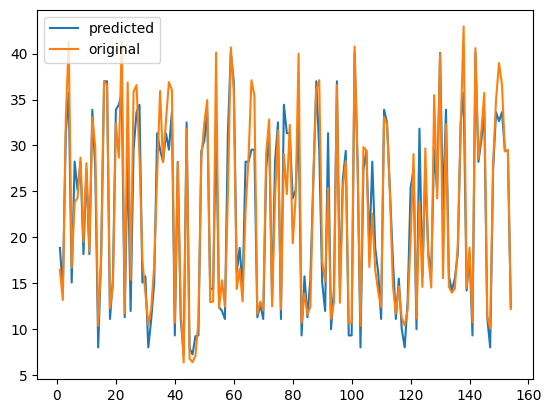

Mean Squared Error 9.217904316197943
R2 score 0.9115639331402812
Root Mean squared Error 3.036100182174156


In [89]:
arr = np.linspace(1,154,154)
plt.figure()
fig, axis = plt.subplots()
axis.plot(arr, Y_pred, label = 'predicted')
axis.plot(arr, Y_test, label = 'original')
legend = axis.legend()
plt.show()

mse = mean_squared_error(Y_test, Y_pred)
R2 = r2_score(Y_test, Y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error",mse)
print("R2 score",R2)
print("Root Mean squared Error",rmse)

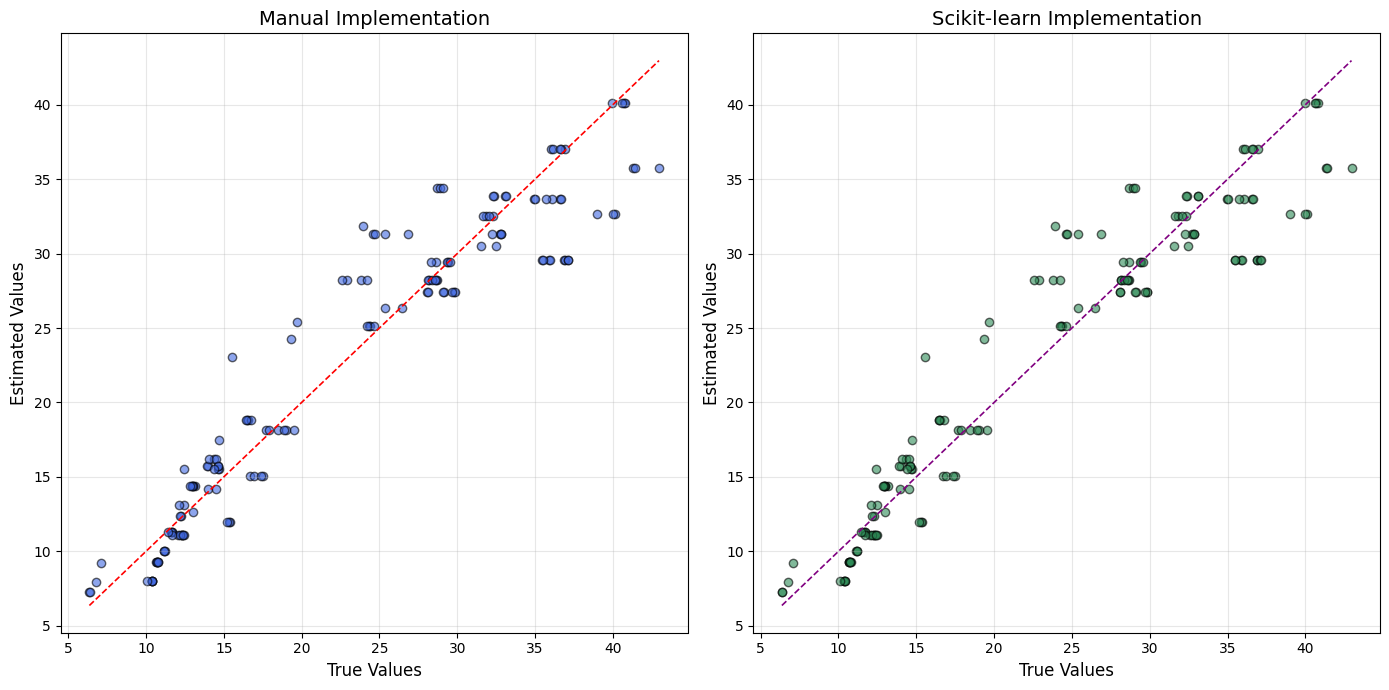

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.scatter(Y_test, Y_pred, alpha=0.6, color='royalblue', edgecolors='black', marker='o')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', linewidth=1.2)
plt.title('Manual Implementation', fontsize=14)
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Estimated Values', fontsize=12)
plt.grid(alpha=0.3)
plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_pred_linear, alpha=0.6, color='seagreen', edgecolors='black', marker='o')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='purple', linestyle='--', linewidth=1.2)
plt.title('Scikit-learn Implementation', fontsize=14)
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Estimated Values', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


part 5
Heating load tends to increase as X1, the relative compactness of a building, rises, primarily because more compact designs trap heat within the structure. On the other hand, reducing the surface area plays a significant role in lowering heating demand, as smaller exposed surfaces result in less heat loss to the surrounding environment. By carefully optimizing the balance between X1 and surface area, designers can create energy-efficient buildings that maintain comfortable indoor temperatures while reducing heating requirements. This approach not only enhances thermal performance but also supports sustainable energy practices.